# Homework 3 MSDS 460
Multiobjective and non-linear optimization

Here we're going to be working with Markowitz models (minimizing variance while maximizing gain)


In [1]:
# import packages
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt



We'll start by bringing in the data set we are working with:

| A | B | C | D | E |
| -: | -: | -: | -: | -: |
| 0.12 | -0.32 | 4.48 | 0.58 | 5.10 |
| 0.13 | 0.30 | -0.69 | -5.03 | -4.66 |
| 0.13 | -0.04 | 7.00 | 5.43 | 2.46 |
| 0.11 | -0.86 | -4.65 | -4.00 | -2.81 |
| 0.11 | -0.18 | 3.03 | 2.00 | 1.76 |
| 0.13 | 1.15 | 2.37 | -1.24 | 0.72 |
| 0.12 | 0.74 | 2.33 | 3.46 | -1.44 |
| 0.13 | 0.34 | 0.69 | -0.66 | 3.61 |
| 0.13 | 0.82 | 5.33 | 4.23 | 3.09 |
| 0.11 | -1.23 | 4.38 | -0.39 | 2.35 |
| 0.08 | -1.45 | 2.76 | 5.21 | 2.26 |
| 0.07 | -0.71 | -1.01 | 2.85 | -1.09 |
| 0.97 | 7.50 | 18.31 | 31.85 | 8.17 |
| 0.07 | 0.14 | 3.84 | 7.24 | 4.64 |
| 0.07 | 0.99 | 10.95 | 18.26 | 15.54 |
| 0.06 | -0.42 | -2.66 | 0.50 | -3.97 |
| 0.06 | -0.03 | -3.80 | -3.04 | -2.60 |
| 0.05 | -0.81 | 7.19 | 7.20 | 5.12 |
| 0.06 | 1.49 | 5.64 | 5.71 | 2.33 |
| 0.06 | 0.63 | 1.99 | 4.00 | 3.44 |
| 0.06 | 0.46 | 4.76 | 8.79 | 4.50 |
| 0.07 | 1.78 | 12.81 | 15.81 | 6.42 |
| 0.11 | -0.64 | -12.40 | -21.40 | -13.87 |
| 0.13 | 1.82 | -8.24 | -8.01 | -7.74 |
| 0.17 | 1.91 | -0.04 | -0.62 | -2.73 |

<br>

<br>

### Part 1
Calculate the means and the covariance matrices. Assuming we don't have to do this by hand.

$$
\mu = \frac{1}N\sum_{n=1}^N x_n
$$

$$
\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n -\mu)^2
$$

and if we have two vectors $x$ and $y$, we can calculate the covariance as
$$
\sigma_{x,y} = \frac{1}{N-1}\sum_{n=1}^N (x_n - \mu_x)(y_n - \mu_y)
$$

In [2]:
data=  np.array([[ 0.12,  -0.32, 4.48, 0.58, 5.10],
                 [ 0.13,  0.30, -0.69, -5.03, -4.66],
                 [ 0.13,  -0.04, 7.00, 5.43, 2.46],
                 [ 0.11,  -0.86, -4.65, -4.00, -2.81],
                 [ 0.11,  -0.18, 3.03, 2.00, 1.76],
                 [ 0.13,  1.15, 2.37, -1.24, 0.72],
                 [ 0.12,  0.74, 2.33, 3.46, -1.44],
                 [ 0.13,  0.34, 0.69, -0.66, 3.61],
                 [ 0.13,  0.82, 5.33, 4.23, 3.09],
                 [ 0.11,  -1.23, 4.38, -0.39, 2.35],
                 [ 0.08,  -1.45, 2.76, 5.21, 2.26],
                 [ 0.07,  -0.71, -1.01, 2.85, -1.09],
                 [ 0.97,  7.50, 18.31, 31.85, 8.17],
                 [ 0.07,  0.14, 3.84, 7.24, 4.64],
                 [ 0.07,  0.99, 10.95, 18.26, 15.54],
                 [ 0.06,  -0.42, -2.66, 0.50, -3.97],
                 [ 0.06,  -0.03, -3.80, -3.04, -2.60],
                 [ 0.05,  -0.81, 7.19, 7.20, 5.12],
                 [ 0.06,  1.49, 5.64, 5.71, 2.33],
                 [ 0.06,  0.63, 1.99, 4.00, 3.44],
                 [ 0.06,  0.46, 4.76, 8.79, 4.50],
                 [ 0.07,  1.78, 12.81, 15.81, 6.42],
                 [ 0.11,  -0.64, -12.40, -21.40, -13.87],
                 [ 0.13,  1.82, -8.24, -8.01, -7.74],
                 [ 0.17,  1.91, -0.04, -0.62, -2.73]])

# I think I need to convert everything from percentages to rates
data = data*.01


# mean
means = np.mean(data,axis=0).tolist()
# covariance -- unbiased
sig = np.cov(data.T)


print(f"Mean of the five columns are: {means}\n")
print(f"The covariance is \n{np.array2string(sig, precision=2, floatmode='fixed')} \n")
print("note: numpy automatically calculates the unbiased estimator (divides by N-1)")

sig = sig.tolist()


Mean of the five columns are: [0.001324, 0.005352, 0.025747999999999997, 0.031492000000000006, 0.012239999999999996]

The covariance is 
[[3.15e-06 2.61e-05 5.26e-05 9.32e-05 1.91e-05]
 [2.61e-05 3.00e-04 5.80e-04 1.03e-03 2.68e-04]
 [5.26e-05 5.80e-04 4.12e-03 5.80e-03 3.22e-03]
 [9.32e-05 1.03e-03 5.80e-03 9.39e-03 4.67e-03]
 [1.91e-05 2.68e-04 3.22e-03 4.67e-03 3.26e-03]] 

note: numpy automatically calculates the unbiased estimator (divides by N-1)


### Part 2
State the objective function:

As stated above, this is a multi-objective function, trying to minimize the variance of the expected returns while maintaining a minimum return level

Starting with the variables:

$ W \equiv $ proportion invested in each investment <br>
$ R \equiv $ Random variable for return of each investment option <br>
$ exp(R) \equiv $ expected value of each investment option (mean)<br>
$ cov(R) \equiv \Sigma \equiv $ covariance of investment options <br>

This gives us the following functions:

Rate of Return (as a result of the random variables) = $ R^TW $ <br>
Expected Value = $exp(R)^TW$ <br>
Variance of Return = $W^T \Sigma W$

Which means that we are wanting to minimize
$W^T \Sigma W$



#### Defining the objective function as a python function

In [3]:
# Covariance is the same for this problem
# but we'll pass it as a variable for future usage 
def obj(W,Sig):
    return np.matmul(W, np.matmul(Sig, W))

### Part 3
Define the constraints

We want the return of the investments to be greater than some minimum value

$ exp(R)^TW \ge \mu_{min}$



Additionally, you can't invest more money than you have

$ \sum_i^N W_i = 1 $

In [4]:
# calculate returns -- makes it easier to report this later
def rets(W, mu):
    return np.matmul(mu,W)

# minimum returns
def return_const(W, mu, mu_min):
    return (np.matmul(mu,W) - mu_min).tolist() # they're vectors, numpy should take care of that

# probably easier to just define this inside the call to optimize below, but whatevs
def total_const(W):
    return (np.sum(W) - 1).tolist()

def pos_const(W): # require positivity constraints
    return np.sum(W).tolist() # if we pass only one variable, this is the same as W>=0

### Part 4
Run through optimize, return the solution

This is going to be for a series of different minimum return values:

$\mu_{min} = $ [.005, .01, .015, .02, .025, .03]

In [5]:
# define mu
mu_mins = [.005, .01, .015, .02, .025, .03]
obj_sol = [0, 0, 0, 0, 0, 0]
sol_space = dict(zip(mu_mins,obj_sol))



for mu_min in sol_space.keys():
    # define constraint dictionary, since mu_min changes
    consts = [{'type':'ineq', 'fun':return_const, 'args':(means,mu_min)},\
        {'type':'eq', 'fun':total_const}]
    # define the function
    func =  optimize.minimize(obj, np.ones([5,1]).tolist(),\
        args=sig, constraints=consts, bounds=[(0,None), (0,None), (0,None), (0,None), (0,None)])
    print("---------------------------------------")
    print(f"For minimum expected value: {mu_min}")
    print(f"Success: {func.success}, Covariance amount: {func.fun}")
    print(f"Expected Return: {rets(func.x, means)}")
    print(f"Variable Values:\n\t{func.x}")
    print("---------------------------------------")
    sol_space[mu_min] = func.fun

---------------------------------------
For minimum expected value: 0.005
Success: True, Covariance amount: 0.00017074639737754747
Expected Return: 0.005000000000060593
Variable Values:
	[4.59422418e-01 3.94395635e-01 3.63971166e-02 1.73472348e-17
 1.09784830e-01]
---------------------------------------
---------------------------------------
For minimum expected value: 0.01
Success: True, Covariance amount: 0.0005525443637361395
Expected Return: 0.010000000001235085
Variable Values:
	[0.35591658 0.3508418  0.27571448 0.01752714 0.        ]
---------------------------------------
---------------------------------------
For minimum expected value: 0.015
Success: True, Covariance amount: 0.0014498199514642281
Expected Return: 0.015000000005517683
Variable Values:
	[0.2449038  0.27307849 0.34217798 0.13983973 0.        ]
---------------------------------------
---------------------------------------
For minimum expected value: 0.02
Success: True, Covariance amount: 0.002394099139582315
Ex

In [6]:
func.x

print(np.matmul(func.x, np.matmul(sig,func.x)))
print(obj(func.x, sig))

0.0076556456013076955
0.0076556456013076955


In [102]:
func.success

True

In [103]:
func.values()

dict_values([array([0.00000000e+00, 9.99200722e-16, 2.59749397e-01, 7.40250603e-01,
       0.00000000e+00]), 0.0076556456013076955, array([0.00016534, 0.00182767, 0.01072825, 0.01691945, 0.00857857]), 2, 12, 2, 0, 'Optimization terminated successfully', True])

In [104]:
rets(func.x, means) - .03

-5.373842135170115e-10

### Part 5
Let's look through the efficient frontier curve

Text(0, 0.5, 'Return')

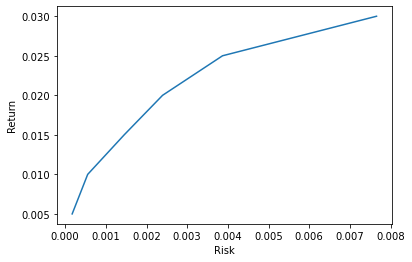

In [7]:
fig, ax = plt.subplots()

ax.plot(sol_space.values(), sol_space.keys())
ax.set_xlabel('Risk')
ax.set_ylabel('Return')


and out of curiousity, let's solve it for a much more dense set of minimum return rates

In [20]:
# define mu
mu_mins = np.arange(0.005, 0.035, 0.001).tolist()
obj_sol = np.zeros(len(mu_mins))
sol_space = dict(zip(mu_mins,obj_sol))



for mu_min in sol_space.keys():
    # define constraint dictionary, since mu_min changes
    consts = [{'type':'ineq', 'fun':return_const, 'args':(means,mu_min)},\
        {'type':'eq', 'fun':total_const}]
    # define the function
    func =  optimize.minimize(obj, np.ones([5,1]).tolist(),\
        args=sig, constraints=consts, bounds=[(0,None), (0,None), (0,None), (0,None), (0,None)], options={'maxiter':10000}, tol=1e-8)
    print("---------------------------------------")
    print(f"For minimum expected value: {mu_min}")
    print(f"Success: {func.success}, Covariance amount: {func.fun}")
    print(f"Expected Return: {rets(func.x, means)}")
    print(f"Variable Values:\n\t{func.x}")
    print("---------------------------------------")
    sol_space[mu_min] = func.fun

---------------------------------------
For minimum expected value: 0.005
Success: True, Covariance amount: 0.00010870010200960485
Expected Return: 0.004999999999599976
Variable Values:
	[8.09904433e-01 4.74060660e-02 1.42689501e-01 3.46944695e-18
 0.00000000e+00]
---------------------------------------
---------------------------------------
For minimum expected value: 0.006
Success: True, Covariance amount: 0.00018862389346336708
Expected Return: 0.0059999999999590875
Variable Values:
	[4.70321984e-01 4.05023331e-01 1.24654685e-01 1.73472348e-18
 2.77555756e-17]
---------------------------------------
---------------------------------------
For minimum expected value: 0.007
Success: True, Covariance amount: 0.0002557269351890431
Expected Return: 0.0069999999972032954
Variable Values:
	[4.40384381e-01 3.91844082e-01 1.67771538e-01 0.00000000e+00
 3.46944695e-18]
---------------------------------------
---------------------------------------
For minimum expected value: 0.008
Success: T

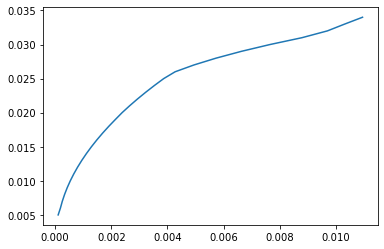

In [21]:
fig, ax = plt.subplots()

ax.plot(sol_space.values(), sol_space.keys())